In [1]:
!pip install rdkit pandas altair

/bin/bash: line 1: /home/mox/Documents/coding_projects/personal projects/RDKit-ligand-examination/.venv/bin/pip: cannot execute: required file not found


In [2]:
import pandas as pd
import altair as alt
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

# Introduction 

The base ligand I worked with as a organic syenthesis intern. The project was in dye sensatized solar cells (DSSCs) This ligand on a Ruthenium dye was suspected to be the charge transfer pathway for an excited dye molecule to pass an electron from the dye to the charge transfer molecule attached to the TiO2 cathode.

The star wildcard was a variety of halide-like functional groups. 

I was synthezising and purifing ligands to run EPR (Electron paramagnetic resonance) to demonstrate the weak electronic bonding analogous to hydrogen bonding between the ligand halide and the charge transfer group. We were successful.

## Generic ligand structure 

In [3]:
def display_smile(smile):
    mol = Chem.MolFromSmiles(smile)
    return Draw.MolToImage(mol)

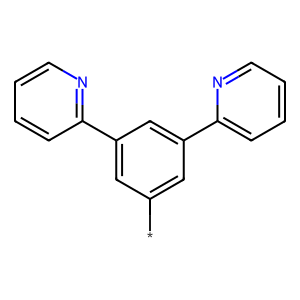

In [4]:
base_smile = 'C1=C(C2=NC=CC=C2)C=C(C2=CC=CC=N2)C=C1(*)'
display_smile(base_smile)

In [5]:
psuedohalogens = ['F', 'Cl', 'Br', 'I', 'C#N', 'N=C=S', 'C(=O)O']

def make_mols(functional_groups, base_smile):
    for fg in functional_groups:
        smile = base_smile.replace('*', fg)
        mol = Chem.MolFromSmiles(smile)
        yield mol

x_F, x_Cl, x_Br, x_I, x_CN, x_SCN, anchor = make_mols(psuedohalogens, base_smile) 
molecules = (x_F, x_Cl, x_Br, x_I, x_CN, x_SCN, anchor)
mol_names = ('X-F', 'X-Cl', 'X-Br', 'X-I', 'X-CN', 'X-SCN', 'Ti-anchor')
df = pd.DataFrame({'name':mol_names, 'molecule':molecules})

# Molecules Synthecized

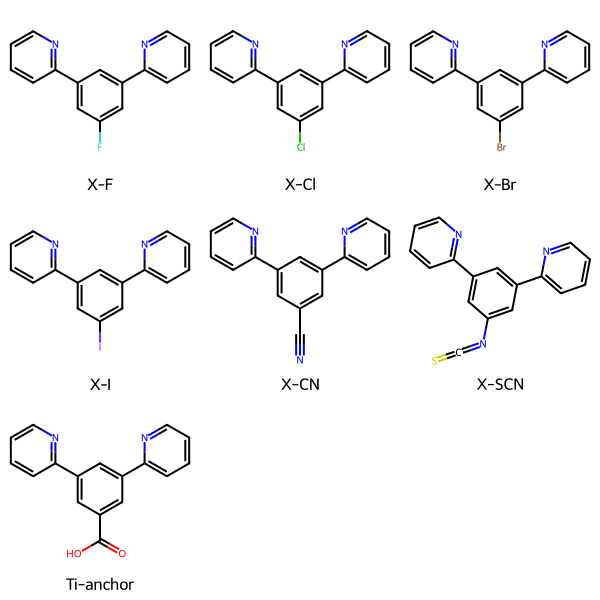

In [6]:
Chem.Draw.MolsToGridImage(molecules, 
                          subImgSize=(200,200),
                          legends=list(df['name']))

# Full Dye molecule

## Confirm bonding and structure
Display the smile in 2D without 3D comfortmation or shape information. 

It is expected to look messy.

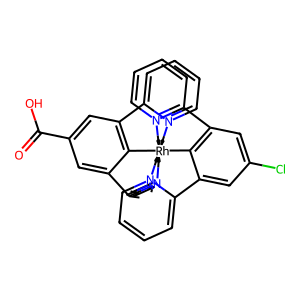

In [7]:
# Smile made from drawing tool here :https://www.rcsb.org/chemical-sketch
# Is not 3d
smile_dye = 'OC(=O)C1=CC2=C3C(=C1)C1=CC=CC=[N]1[Rh]313(C4=C(C=C(Cl)C=C4C4=[N]1C=CC=C4)C1=CC=CC=[N]31)[N]1=CC=CC=C21'
display_smile(smile_dye)

## Add shape and display properties

Add hydrogens and do a 3d shape calculation then return it to a 2D image

It appears one of the pyridine rings is not displaying properly.

In [28]:
from PIL import Image
from io import BytesIO
d2d = Draw.MolDraw2DCairo(350,300)

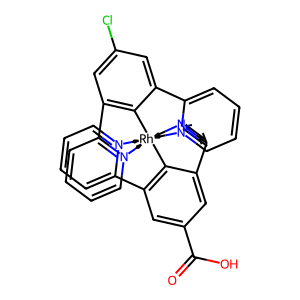

In [33]:
dye_m = Chem.MolFromSmiles(smile_dye)
dye_m_h = Chem.AddHs(dye_m)
AllChem.Compute2DCoords(dye_m_h)
dye_3d_2dimg = Chem.RemoveAllHs(dye_m_h)
Chem.Draw
Draw.MolToImage(dye_3d_2dimg, rotate=-10)

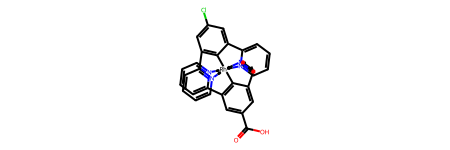

In [34]:
dye_3d_2dimg